# Gradient
* An image gradient is a directional change in the intensity or color in an image
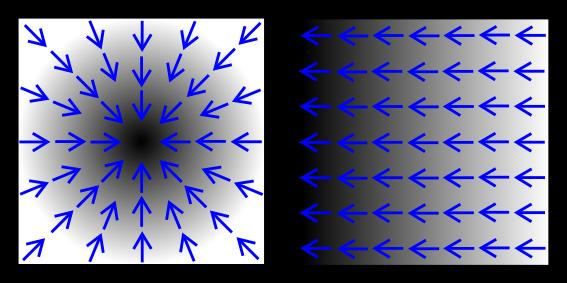
* In the left picture, the intensity increases as you go deep towards the middle
* In the right picture, the intensity increases as you go towards left.
* In this lecture are mainly going to be exploring the basic social Feldmann operators(often just called Sobol for short).
* Later on in the course we're going to expand on this operator for general edge detection.

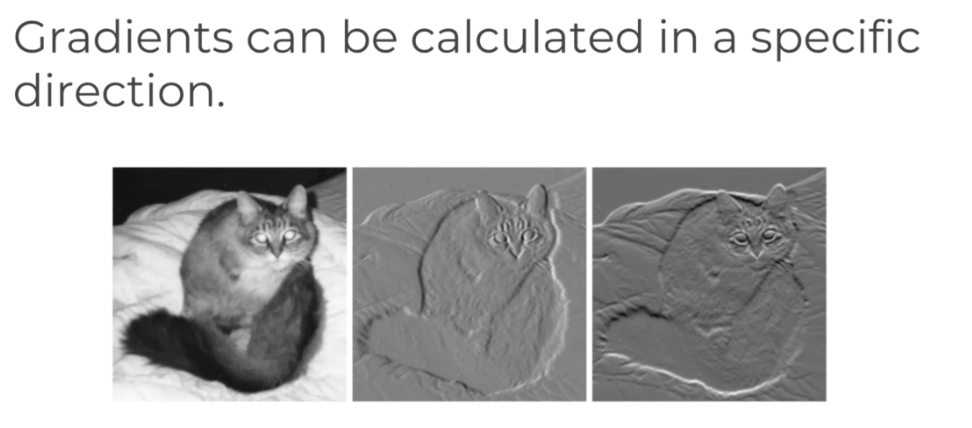
* Here we can see the picutre of a cat with-in x-direction gradient and y-direction gradient

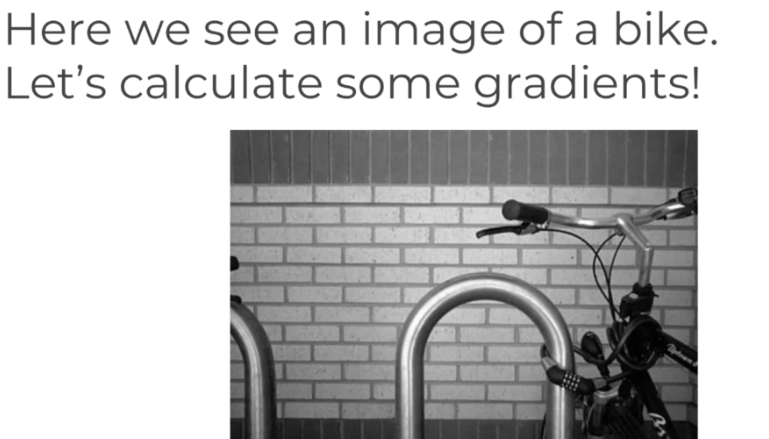

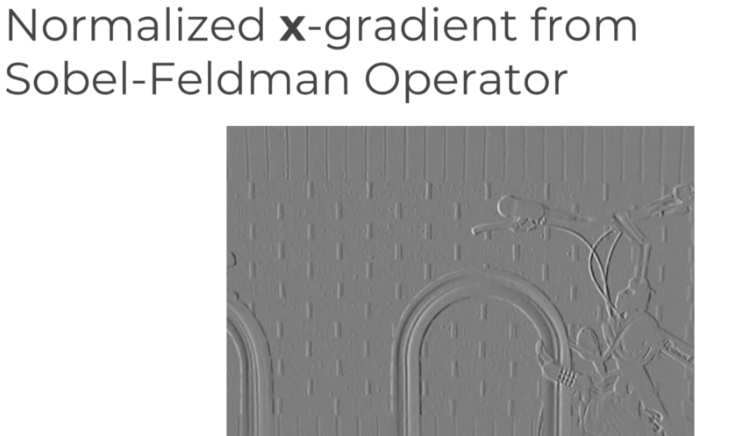
* So if we calculate normalized x-gradient from Sobel-Feldmen Operator, you only end up only seeing things in the verticle direction. 

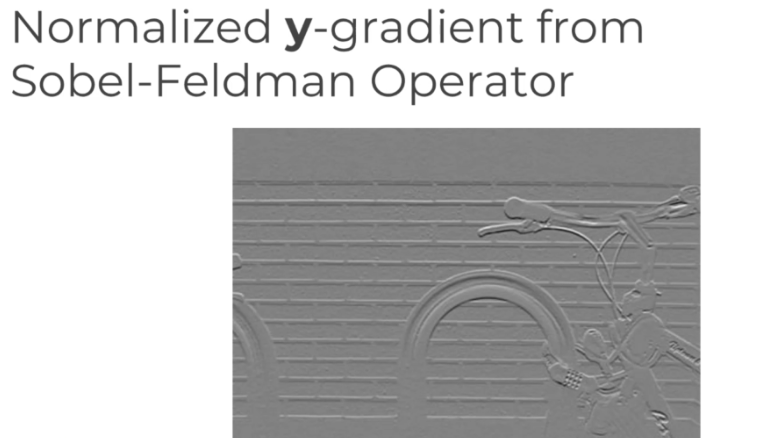
* So if we calculate normalized y-gradient from Sobel-Feldmen Operator, you only end up only seeing things in the horizontal direction.

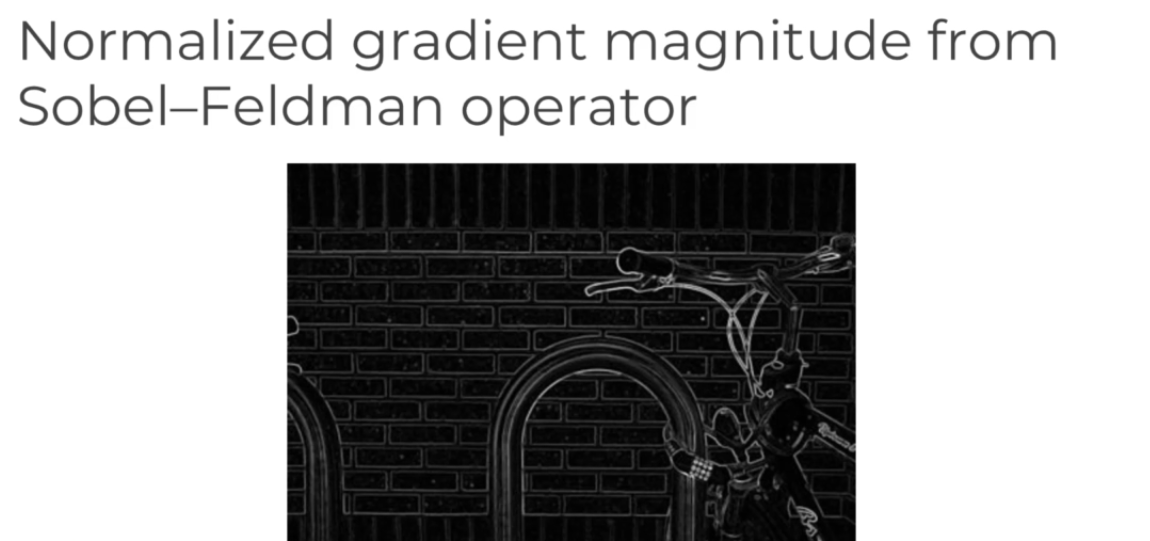
* Normalized gradient magnitude from Sobel-Feldmen Operator, shows both sides of an image (horizontal and verticle)

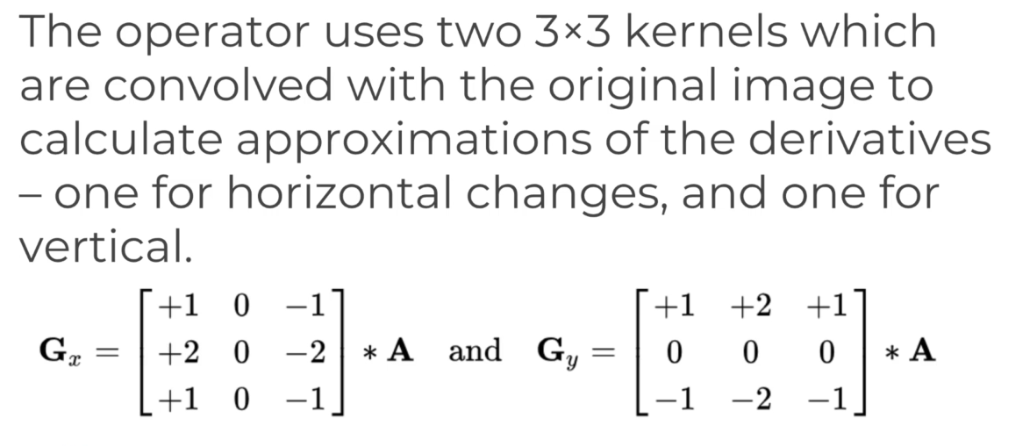

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

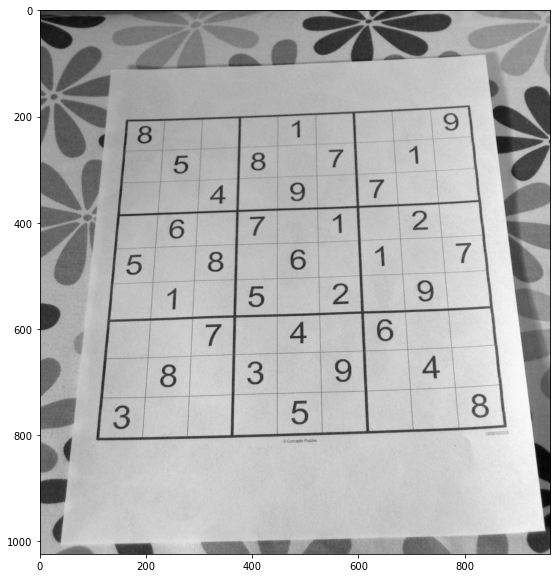

In [6]:
img = cv2.imread('../Data/sudoku.jpg',0)
display_img(img)

## CV2 :: Sobel
* Using the sobel operation, you can detect the edges of an image in both horizontal and vertical directions. You can apply sobel operation on an image using the method sobel().
* Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
* This method accepts the following parameters −
* src − An object of the class Mat representing the source (input) image.
* dst − An object of the class Mat representing the destination (output) image.
* ddepth − An integer variable representing the depth of the image (-1) , there are multiple ddepth methods to use you can play around with them to get your desired output.
* ksize - The kernel size.
* dx − An integer variable representing the x-derivative. (0 or 1)
* dy − An integer variable representing the y-derivative. (0 or 1)

More to read about ddepth,
* [ https://answers.opencv.org/question/4783/image-type-vs-image-depth/ ]
* [ https://answers.opencv.org/question/742/matrix-depth-equals-0/#747 ]
* [ https://docs.opencv.org/2.4/modules/core/doc/intro.html#fixed-pixel-types-limited-use-of-templates ]

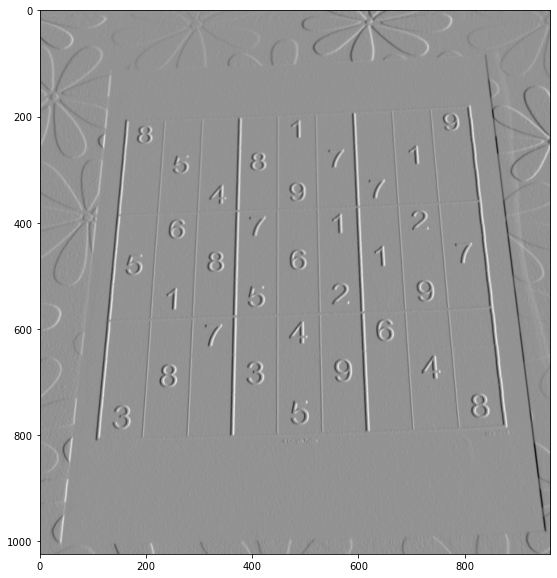

In [8]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) # x-gradient
display_img(sobelx)

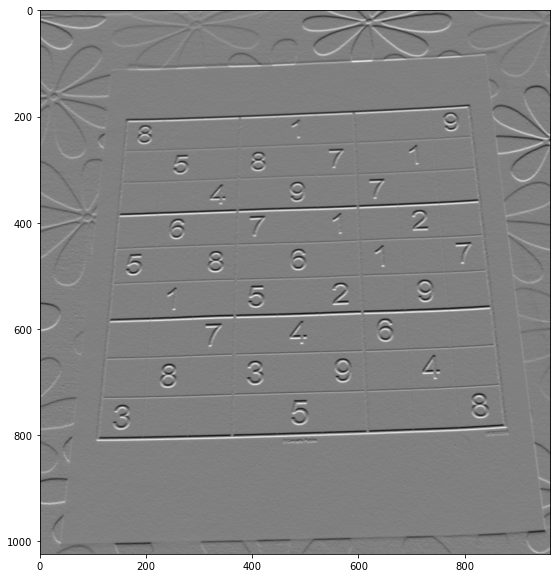

In [9]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) # y-gradient
display_img(sobely)

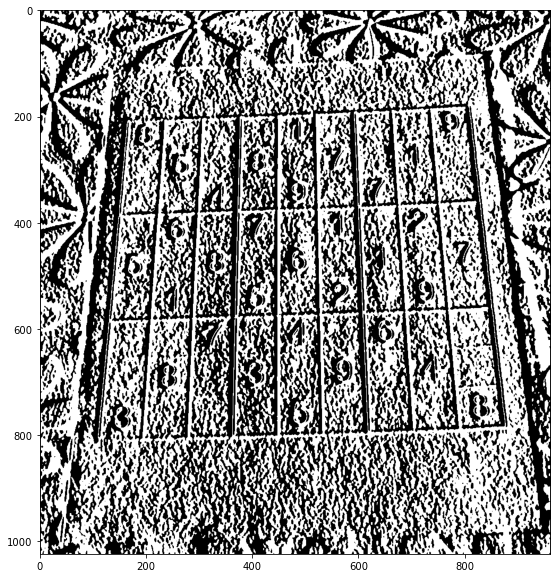

In [11]:
# let's try using different ddepth methods with different kernel sizes.
result = cv2.Sobel(img,cv2.CV_16UC1,1,0,ksize=15) # x-gradient
display_img(result)

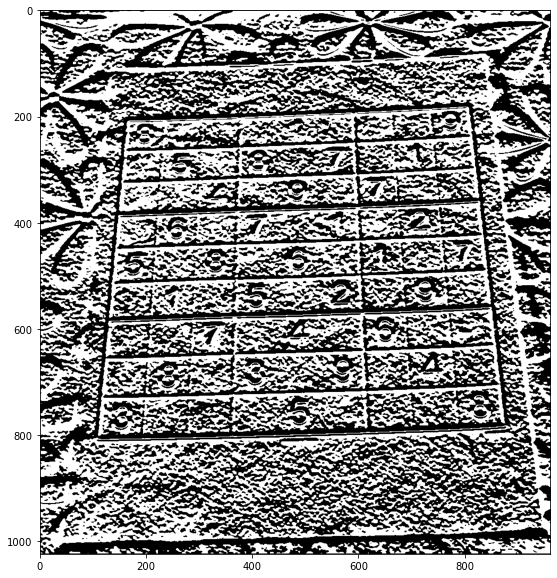

In [14]:
result = cv2.Sobel(img,cv2.CV_16UC1,0,1,ksize=15) # y-gradient
display_img(result)

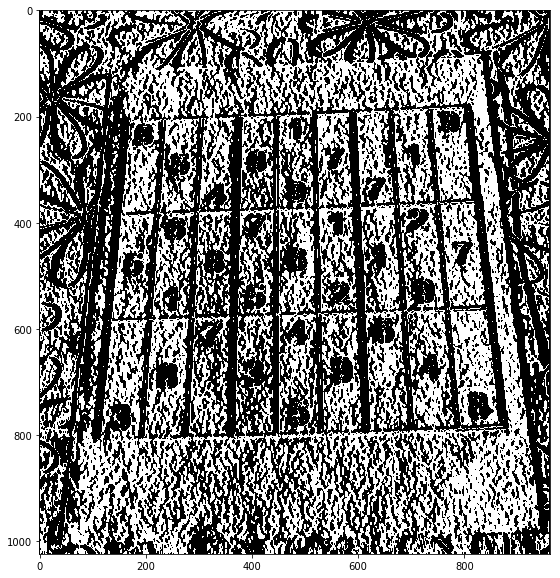

In [102]:
result = cv2.Sobel(img,cv2.CV_16UC1,1,0,ksize=17) # x-gradient
display_img(result)

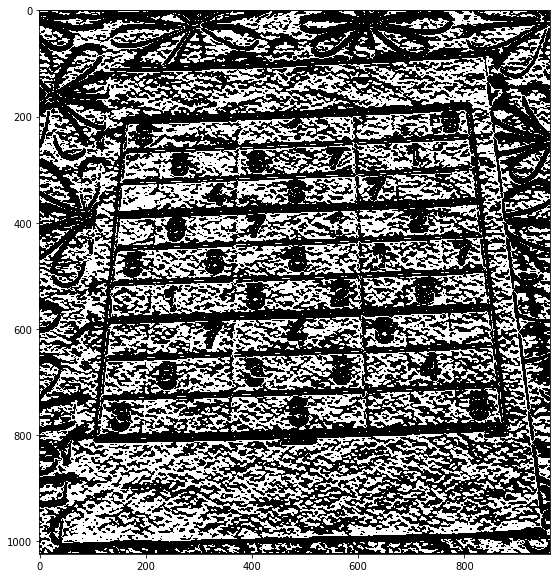

In [103]:
result = cv2.Sobel(img,cv2.CV_16UC1,0,1,ksize=17) # y-gradient
display_img(result)

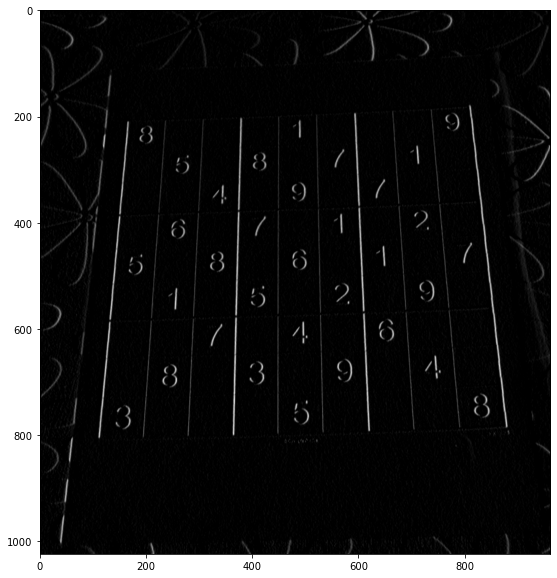

In [15]:
# let's try using different ddepth methods with different kernel sizes.
result = cv2.Sobel(img,cv2.CV_16UC1,1,0,ksize=5) # x-gradient
display_img(result)

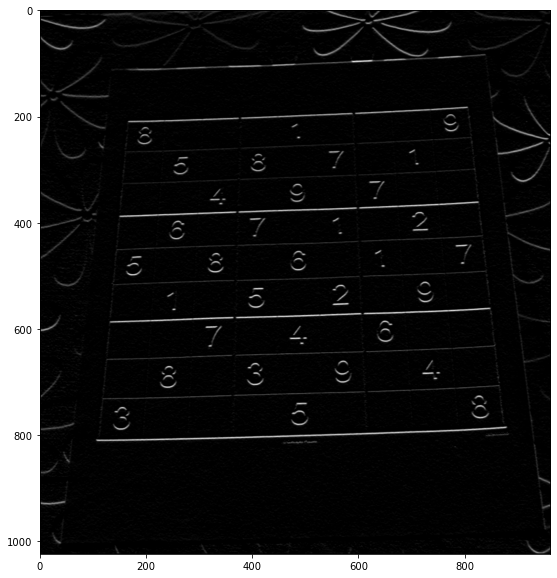

In [16]:
result = cv2.Sobel(img,cv2.CV_16UC1,0,1,ksize=5) # y-gradient
display_img(result)

## Laplacian Operator
* There are multiple edge detection techqniues and operator but we will discuss Laplacian Operator.
* Laplacian Operator is also a derivative operator which is used to find edges in an image. The major difference between Laplacian and other operators like Prewitt, Sobel, Robinson and Kirsch is that these all are first order derivative masks but Laplacian is a second order derivative mask.
$$Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst$$
* We will be using only two or three paramters
* src - This is the image that you want to convolve.
* dst - This image stores the final result of the convolution. It should be the same size and have the same number of channels as src. This can be the same as src (in place operation is supported).
* ddepth - This is the desired bit depth of the final result (8, 16, 32, etc). It it is negative, the depth is the same as the source image.
* kernel - The convolution kernel used to convolve the source image. This has to be a single channel, floating point matrix. If you want to apply different kernels to different channels, you need to split the channels, and convolve each of them them individually.

* More to read here,
* [ https://www.tutorialspoint.com/dip/laplacian_operator.htm ]
* [ https://aishack.in/tutorials/image-convolutions-opencv/ ]
*[https://math.libretexts.org/Bookshelves/Calculus/Book%3A_Vector_Calculus_(Corral)/04%3A_Line_and_Surface_Integrals/4.06%3A_Gradient_Divergence_Curl_and_Laplacian ]

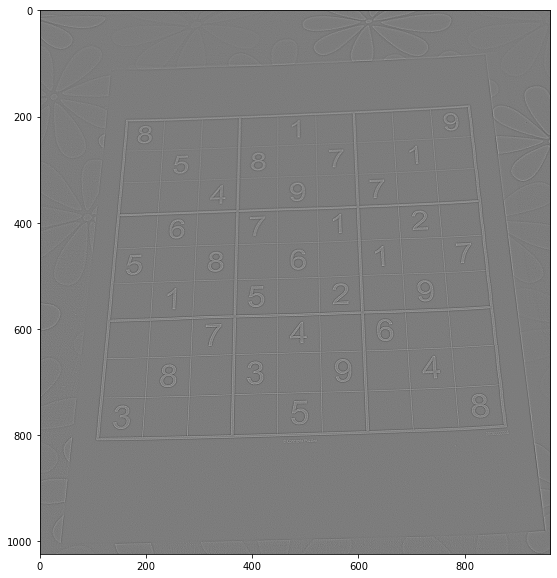

In [18]:
result = cv2.Laplacian(img,cv2.CV_64F)
display_img(result)
# you can play around with different operation types and different kernels

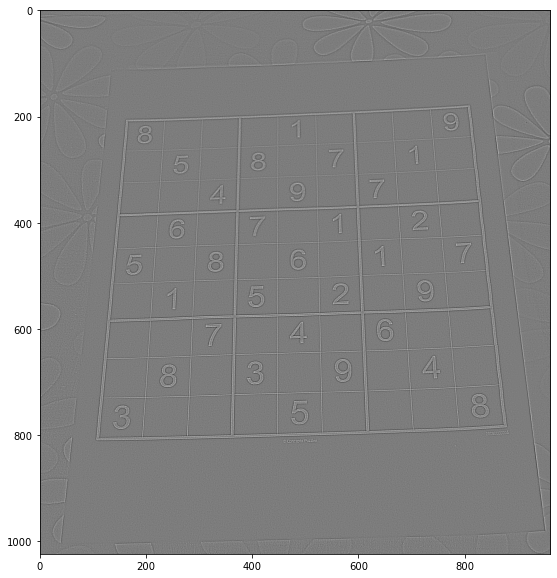

In [19]:
result = cv2.Laplacian(img,cv2.CV_64F,ksize = 3)
display_img(result)

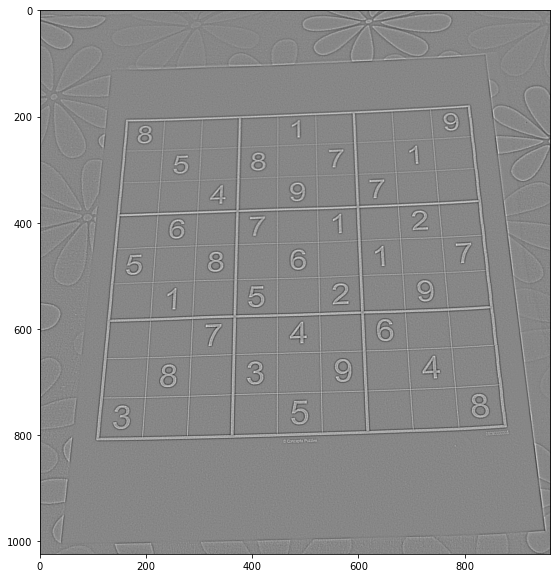

In [20]:
result = cv2.Laplacian(img,cv2.CV_64F,ksize = 5)
display_img(result)

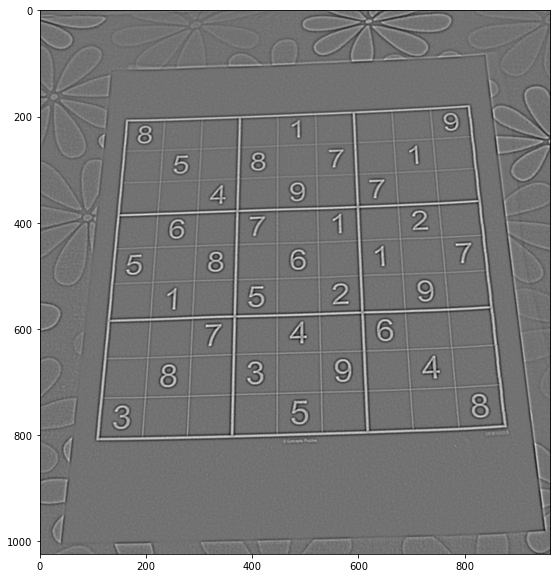

In [21]:
result = cv2.Laplacian(img,cv2.CV_64F,ksize = 11)
display_img(result)

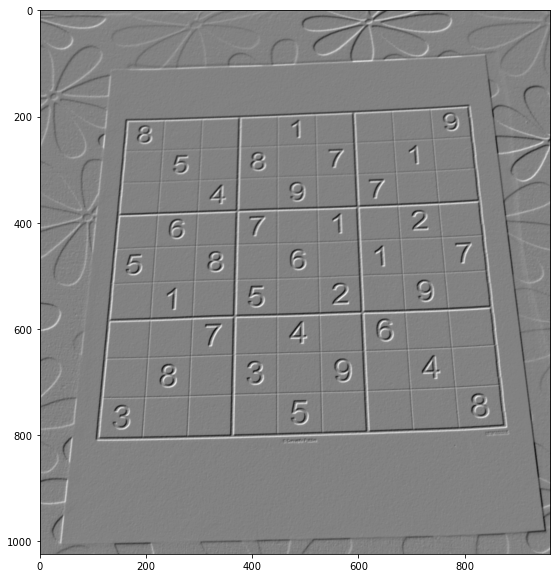

In [26]:
# if we dont get our desired output , we can surely use methods that we have seen previously to get our desired result.
# here we can simply use blending
blended = cv2.addWeighted(sobelx,0.3,sobely,0.3,0)
display_img(blended)

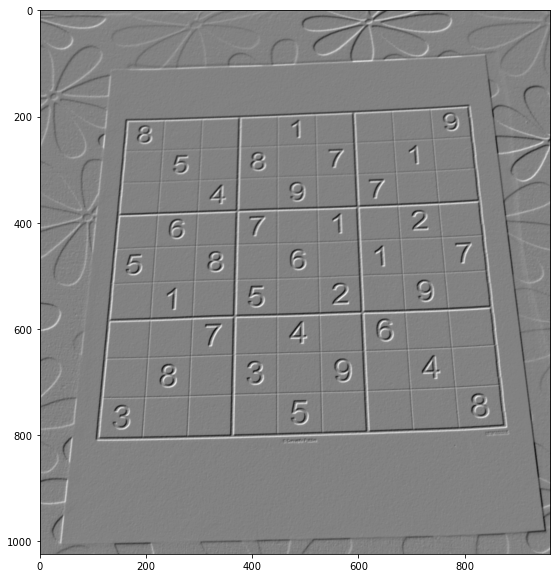

In [27]:
# lets try with different alpha beta and gamma values
result = cv2.addWeighted(sobelx,0.5,sobely,0.5,0.3)
display_img(result)

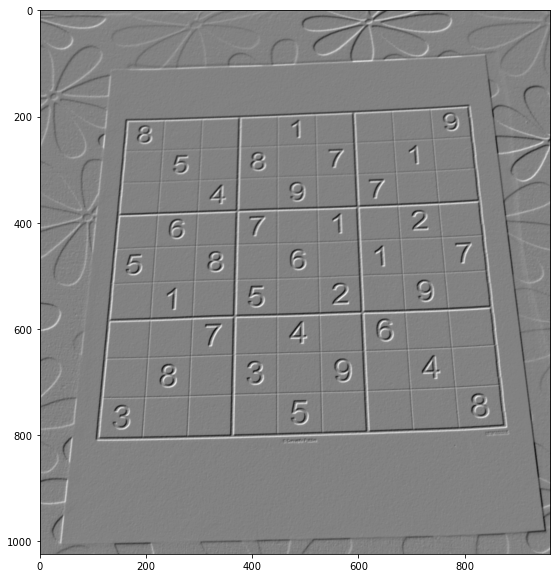

In [28]:
# lets try with different alpha beta and gamma values
result = cv2.addWeighted(sobelx,0.5,sobely,0.5,0.5)
display_img(result)

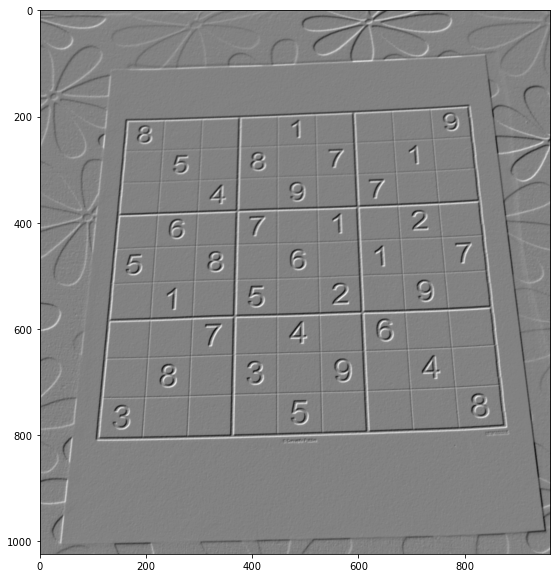

In [32]:
# lets try with different alpha beta and gamma values
result = cv2.addWeighted(sobelx,0.9,sobely,0.9,0.9)
display_img(result)

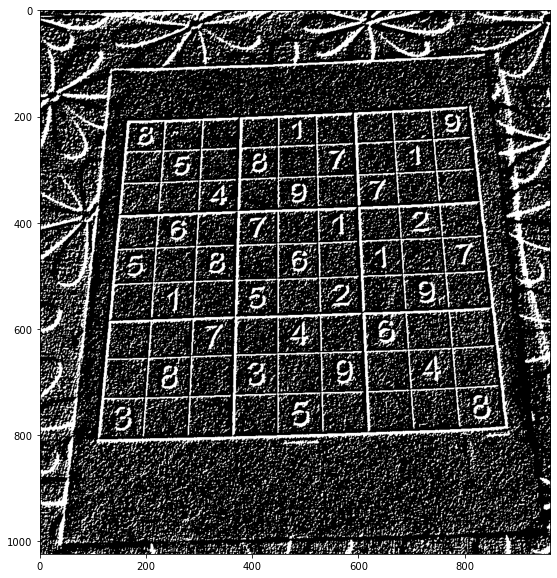

In [33]:
# we can apply threshold as well,  which also leads to edge detection
val,img = cv2.threshold(blended,50,255,cv2.THRESH_BINARY)
# blended.min(),blended.max()
display_img(img)

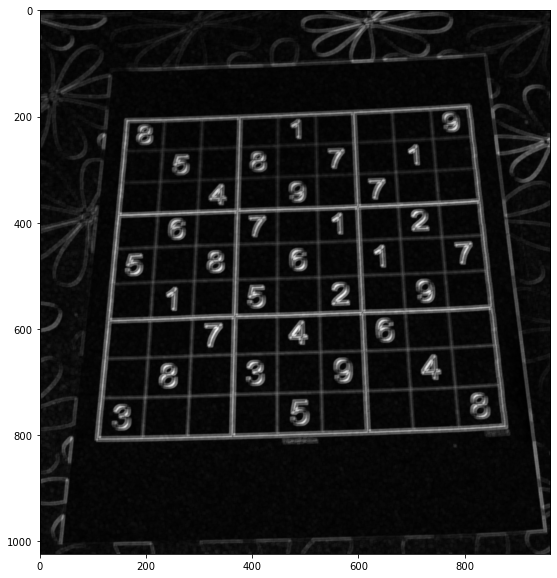

In [34]:
# we can also try morphology gradient
kernel = np.ones((5,5),dtype=np.uint16)
result = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
display_img(result)